<a href="https://colab.research.google.com/github/Jeffrowetull/DS-Unit-2-Sprint-2-Regression/blob/master/Regression_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Regression Sprint Challenge

For this Sprint Challenge, you'll predict the price of used cars. 

The dataset is real-world. It was collected from advertisements of cars for sale in the Ukraine in 2016.

The following import statements have been provided for you, and should be sufficient. But you may not need to use every import. And you are permitted to make additional imports.

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

[The dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv) contains 8,495 rows and 9 variables:

- make: manufacturer brand
- price: seller’s price in advertisement (in USD)
- body: car body type
- mileage: as mentioned in advertisement (‘000 Km)
- engV: rounded engine volume (‘000 cubic cm)
- engType: type of fuel
- registration: whether car registered in Ukraine or not
- year: year of production
- drive: drive type

Run this cell to read the data:

In [25]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.sample(10)

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
4943,77,11500.0,5,210,2.00,0,1,2012,0
4421,74,7500.0,4,196,1.59,3,1,2003,0
6079,55,2500.0,3,5,3.00,1,1,1988,0
1838,58,37500.0,0,42,4.80,3,1,2009,1
329,77,19100.0,3,4,1.60,2,1,2016,0
3772,42,43000.0,0,70,3.60,0,1,2010,1
1104,55,6999.0,3,85,1.60,3,1,2009,0
463,5,6500.0,3,335,2.80,3,1,1996,2
7574,77,2200.0,1,400,1.30,2,1,1987,0
5408,74,7000.0,2,220,1.80,3,1,2001,0


# Predictive Modeling with Linear Regression

## 1.1 Split the data into an X matrix and y vector (`price` is the target we want to predict).

In [0]:
X = df[['make','body','mileage','engV','engType','registration','year','drive']]
y=df['price']

## 1.2 Split the data into test and train sets, using `train_test_split`.
You may use a train size of 80% and a test size of 20%.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20)

## 1.3 Use scikit-learn to fit a multiple regression model, using your training data.
Use `year` and one or more features of your choice. You will not be evaluated on which features you choose. You may choose to use all features.

In [28]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 1.4 Report the Intercept and Coefficients for the fitted model.

In [29]:
print('intercept:',model.intercept_)
pd.Series(model.coef_,X.columns)

intercept: -2273093.691240952


make             -32.664170
body           -1708.852786
mileage          -40.929246
engV             294.892469
engType        -1216.686041
registration    4851.749169
year            1142.412526
drive           8461.573504
dtype: float64

## 1.5 Use the test data to make predictions.

In [0]:
y_pred = model.predict(X_test)

## 1.6 Use the test data to get both the Root Mean Square Error and $R^2$ for the model. 
You will not be evaluated on how high or low your scores are.

In [31]:
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n R^2',r2_score(y_test,y_pred))

RMSE: 22269.494022621428

 R^2 0.27344300790999754


## 1.7 How should we interpret the coefficient corresponding to the `year` feature?


The coefficient for year can be interpreted as the the increase in price per year.

## 1.8 How should we interpret the Root Mean Square Error?


My predictions were off by about 19,640 hryvinia.

## 1.9 How should we interpret the $R^2$?


My model doesn't fit very well because it has a low score.

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [0]:
df['log_price']=np.log(df['price'])

## 2.2 Visualize scatterplots of the relationship between each feature versus the log of price, to look for non-linearly distributed features.
You may use any plotting tools and techniques.

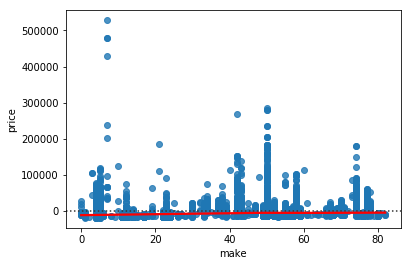

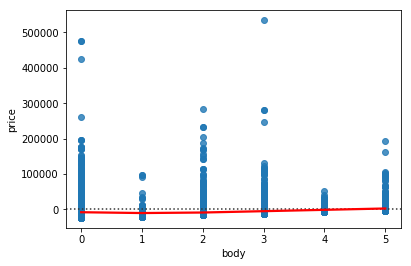

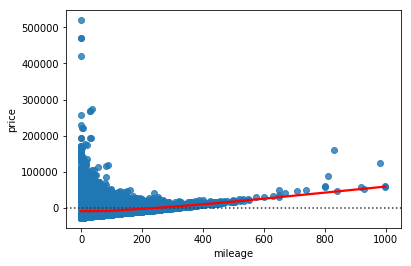

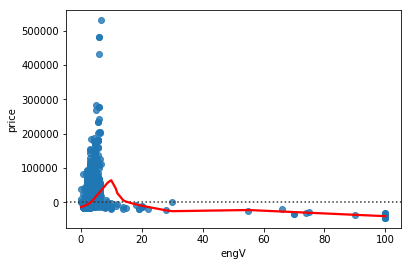

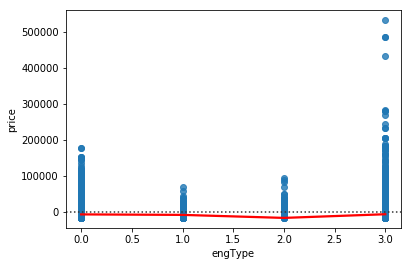

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


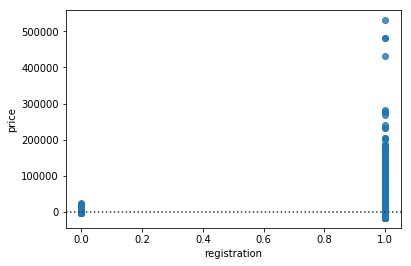

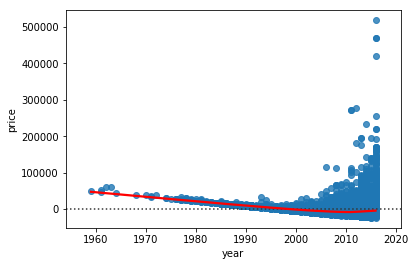

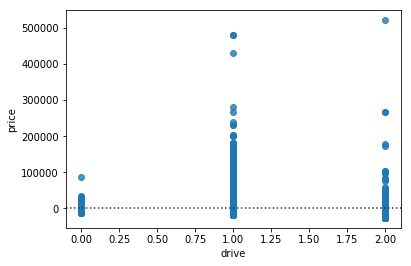

In [33]:
import seaborn as sns
for column in X.columns:
  sns.residplot(X[column], y, lowess=True, line_kws=dict(color='r'))
  plt.show()

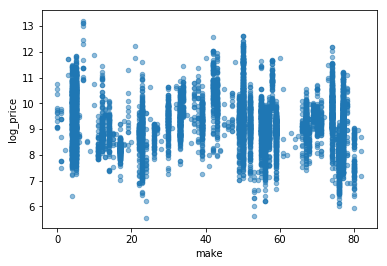

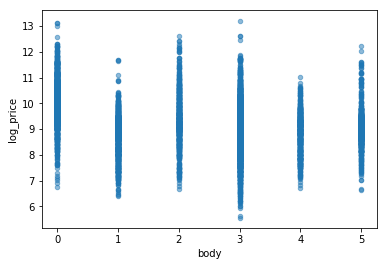

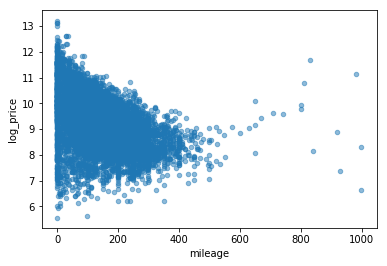

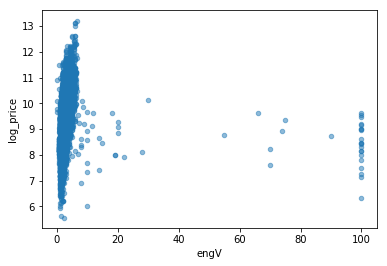

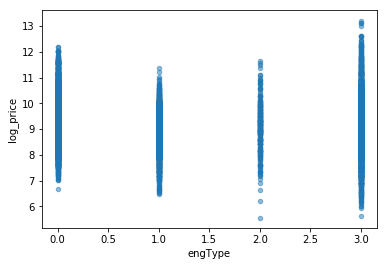

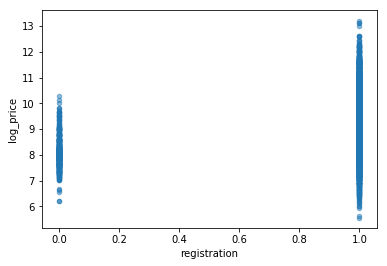

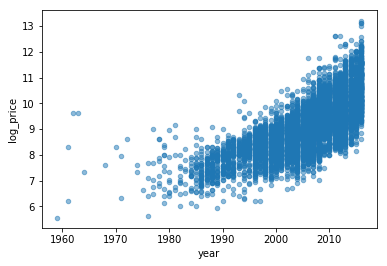

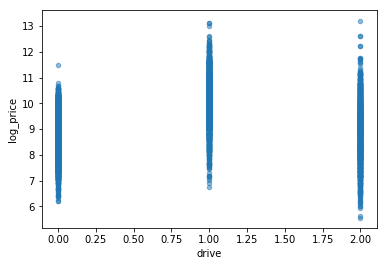

In [34]:
for column in X.columns:
  df.plot(x=column,y='log_price',kind='scatter',alpha=.5)

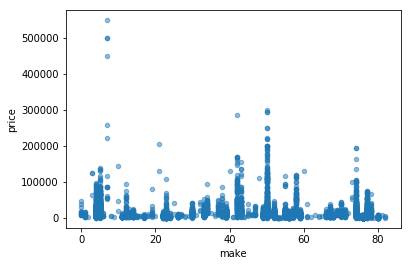

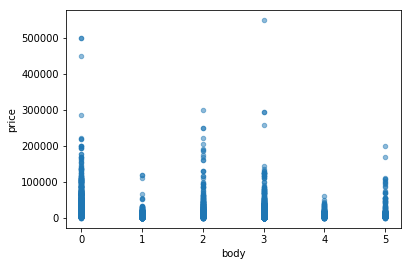

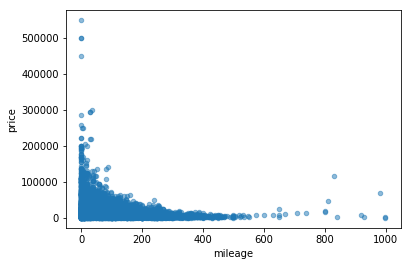

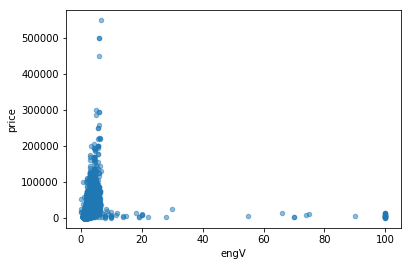

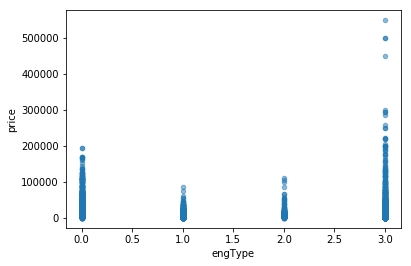

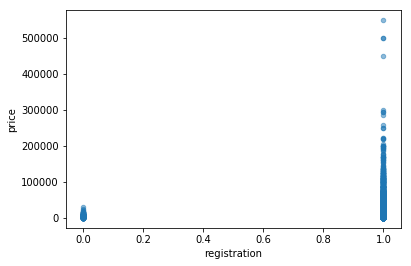

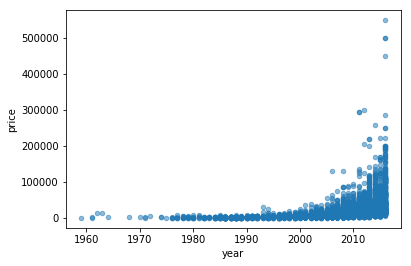

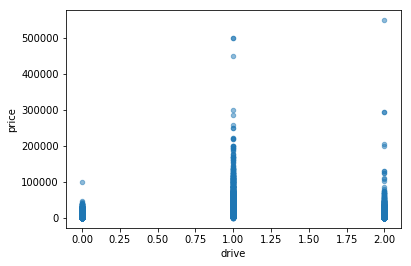

In [35]:
for column in X.columns:
  df.plot(x=column,y='price',kind='scatter',alpha=.5)

Year looks like it. mileage too.

## 2.3 Create polynomial feature(s)
You will not be evaluated on which feature(s) you choose. But try to choose appropriate features.

In [0]:
df['year_squared'] = df['year']**2
df['mileage_squared'] = df['mileage']**2

## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [37]:
X = df[['make','body','mileage','engV','engType',
        'registration','year','drive','mileage_squared','year_squared']]
y = df['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.50, test_size=0.50)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)

print('Root Mean Squared Error', rmse)
print('R^2 Score', r2)
print('Intercept', model.intercept_)
coefficients = pd.Series(model.coef_, X_train.columns)
print(coefficients.to_string())

Root Mean Squared Error 0.5586989507148826
R^2 Score 0.668060529243124
Intercept 6777.288639915637
make              -0.001810
body              -0.089799
mileage            0.000384
engV               0.006610
engType           -0.048735
registration       0.670779
year              -6.865995
drive              0.366451
mileage_squared    0.000001
year_squared       0.001741


## 2.5 How do we interpret coefficients in Log-Linear Regression (differently than Ordinary Least Squares Regression)?
One sentence can be sufficient

Instead of a set amount of change, LLR coefficients represent a percentage of change.

# Decision Trees

## 3.1 Use scikit-learn to fit a decision tree regression model, using your training data.
Use one or more features of your choice. You will not be evaluated on which features you choose. You may choose to use all features.

You may use the log-transformed target or the original un-transformed target. You will not be evaluated on which you choose.

In [38]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

## 3.2 Use the test data to get the $R^2$ for the model. 
You will not be evaluated on how high or low your scores are.

In [39]:
print('Train R^2 score:', tree.score(X_train, y_train))
print('Test R^2 score:', tree.score(X_test, y_test))

Train R^2 score: 0.9998357175150873
Test R^2 score: 0.8453799205173202


# Regression Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [40]:
model = sm.OLS(y, X)
results = model.fit(cov_type='HC3')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 2.793e+05
Date:                Fri, 03 May 2019   Prob (F-statistic):               0.00
Time:                        16:25:12   Log-Likelihood:                -7135.7
No. Observations:                8495   AIC:                         1.429e+04
Df Residuals:                    8485   BIC:                         1.436e+04
Df Model:                          10                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
make               -0.0016      0.000     

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. 

### Do we have multicollinearity problems?

Year and year_squared are highly collinear. Dropping one of the two reduces my r^2 by around 30%. :(

In [41]:
X =sm.add_constant(X)
vif = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
pd.Series(vif, X.columns)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const              3.417162e+09
make               1.060436e+00
body               1.170016e+00
mileage            7.512926e+00
engV               1.010582e+00
engType            1.171764e+00
registration       1.108727e+00
year               1.640060e+05
drive              1.140499e+00
mileage_squared    5.067267e+00
year_squared       1.643410e+05
dtype: float64

In [42]:
X = df[['make','body','mileage','engV','engType',
        'registration','year_squared','drive', 'mileage_squared']]
y = df['log_price']

X =sm.add_constant(X)
vif = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
pd.Series(vif, X.columns)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const              31884.369583
make                   1.059361
body                   1.168776
mileage                5.417305
engV                   1.009458
engType                1.147515
registration           1.095701
year_squared           1.487059
drive                  1.134722
mileage_squared        4.377870
dtype: float64

In [43]:
model = sm.OLS(y, X)
results = model.fit(cov_type='HC3')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     1514.
Date:                Fri, 03 May 2019   Prob (F-statistic):               0.00
Time:                        16:25:12   Log-Likelihood:                -7140.2
No. Observations:                8495   AIC:                         1.430e+04
Df Residuals:                    8485   BIC:                         1.437e+04
Df Model:                           9                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -85.9830      1.727    -